# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

Introduction:

The objective of this project is to assist the hotel in making informed decisions regarding cancellations. The analysis of Predicting Hotel Cancellations is based on three parts: a preprocessing phase to extract and clean variables, statistical analysis, and visualization, and the construction of models using Random Forest and Tensorflow.

The statistical analysis reveals that certain variables are interesting in predicting booking cancellations. For instance, the average lead time is higher for guests who canceled their booking (139 days) compared to those who didn't (58 days). Furthermore, the average lead time for booking status 1 is much higher than for booking status 0, indicating that guests who cancel their bookings tend to book farther from the arrival date.

We also observe that the average price per room is higher for booking status 1, indicating that guests who cancel their bookings tend to book more expensive rooms. Additionally, guests who canceled their bookings have a higher mean value of no_of_previous_cancellations (0.76) compared to those who didn't (0.33), suggesting that previous cancellations may be a significant factor in predicting cancellations. Finally, we observe that the variable no_of_special_requests has a higher mean value for guests who didn't cancel their bookings (0.76) compared to those who did (0.33), which may indicate that guests who request more special requests are less likely to cancel their bookings.

The construction of models resulted in impressive scores compared to a random guess, which is 0.67 for Not_Canceled and 0.33 for Canceled. The random forest model achieved an accuracy of 90%, while the Tensorflow model achieved an accuracy of 86%. These models can assist the hotel in predicting cancellations and making appropriate decisions.

In [75]:
import pandas as pd
hotels = pd.read_csv("data/hotel_bookings.csv")
hotels

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [76]:
hotels.shape

(36275, 19)

## The Challenge

* Use your skills to produce recommendations for the hotel on what factors affect whether customers cancel their booking.

### Note:

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## Judging Criteria

| CATEGORY | WEIGHTING | DETAILS                                                            |
|---------|----------|---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul>|
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul>|
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

## Time is ticking. Good luck! 

In [77]:
#imports the necessary dependencies
import seaborn as sns
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
# reads a CSV file named "hotel_bookings.csv" into a pandas DataFrame named "df", and displays the first few rows
df = pd.read_csv("data/hotel_bookings.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [79]:
# check the shape of our data
df.shape

(36275, 19)

In [80]:
## missing values
df.isna().mean()

Booking_ID                              0.000000
no_of_adults                            0.011385
no_of_children                          0.008932
no_of_weekend_nights                    0.010117
no_of_week_nights                       0.022247
type_of_meal_plan                       0.014500
required_car_parking_space              0.071454
room_type_reserved                      0.032281
lead_time                               0.013012
arrival_year                            0.010420
arrival_month                           0.013894
arrival_date                            0.027043
market_segment_type                     0.041682
repeated_guest                          0.016154
no_of_previous_cancellations            0.013701
no_of_previous_bookings_not_canceled    0.015162
avg_price_per_room                      0.012681
no_of_special_requests                  0.021751
booking_status                          0.000000
dtype: float64

In [81]:
# chech the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

# Data Preprocessing

In [82]:
# Finding rows with at least 2 missing values
df[df.isna().sum(axis=1)>2].shape

(917, 19)

In [83]:
# Checking the balance of the target variable
df.booking_status.value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

In [84]:
# keep only rows that have less than three NaN values
df=df[df.isna().sum(axis=1)<2]
df.shape

(33563, 19)

In [85]:
# check again the nan values
df.isna().sum()

Booking_ID                                 0
no_of_adults                             203
no_of_children                             0
no_of_weekend_nights                     109
no_of_week_nights                        523
type_of_meal_plan                        216
required_car_parking_space              1689
room_type_reserved                       522
lead_time                                190
arrival_year                               0
arrival_month                              0
arrival_date                             755
market_segment_type                      519
repeated_guest                             0
no_of_previous_cancellations             372
no_of_previous_bookings_not_canceled     206
avg_price_per_room                       345
no_of_special_requests                   403
booking_status                             0
dtype: int64

In [86]:
# one hot encode the target values
df.booking_status=df.booking_status.map({"Not_Canceled":0,"Canceled":1})

In [87]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,0
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,1
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,1
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,1
5,INN00006,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018.0,9.0,13.0,Online,0.0,0.0,0.0,115.00,1.0,1


In [88]:
#The objective is to have a better understanding of the characteristics of each column before proceeding to the exploratory data analysis. Check which will be categorical and which will be numerical.
for i in df.columns:
    print(i,"----",df[i].nunique())

Booking_ID ---- 33563
no_of_adults ---- 5
no_of_children ---- 6
no_of_weekend_nights ---- 7
no_of_week_nights ---- 18
type_of_meal_plan ---- 4
required_car_parking_space ---- 2
room_type_reserved ---- 7
lead_time ---- 352
arrival_year ---- 2
arrival_month ---- 12
arrival_date ---- 31
market_segment_type ---- 5
repeated_guest ---- 2
no_of_previous_cancellations ---- 9
no_of_previous_bookings_not_canceled ---- 59
avg_price_per_room ---- 3752
no_of_special_requests ---- 6
booking_status ---- 2


In [89]:
# converting certain columns in the dataframe df from their original data type to string data type. Convert arrival date and month
#df['arrival_year'] = df['arrival_year'].astype(str)
df['arrival_month'] = df['arrival_month'].astype(str)
df['arrival_date']=df.arrival_date.astype(str)
df['required_car_parking_space']=df.required_car_parking_space.astype(str)

In [90]:
# We create a new column 'date' to extract the day of week and weekend information from it
df.arrival_year=df.arrival_year.astype(str).str.split(".",expand=True)[0]
df.arrival_date=df.arrival_date.str.split("." ,expand=True)[0]
df.arrival_month=df.arrival_month.str.split("." ,expand=True)[0]
df.arrival_date.fillna(method='ffill',inplace=True)

# This new 'date' column will be used to extract day of the week and weekend information.
df['date'] = pd.to_datetime(df['arrival_year'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_date'].astype(str), errors='coerce')

In [91]:
# creates two new columns date
df['day'] = df['date'].dt.day_name()
# reated by checking if the day of the week from the "date" column is a weekend day (Saturday or Sunday) or not
df['is_weekend'] = df['date'].dt.dayofweek.isin([5,6])

In [92]:
# we drop the date column
df.drop(["date","Booking_ID"],axis=1,inplace=True)

In [93]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,day,is_weekend
1,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018,11,6,Online,0.0,0.0,0.0,106.68,1.0,0,Tuesday,False
2,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018,2,28,Online,0.0,0.0,0.0,60.00,0.0,1,Wednesday,False
3,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018,5,20,Online,0.0,0.0,0.0,100.00,0.0,1,Sunday,True
4,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018,4,11,Online,0.0,0.0,0.0,94.50,0.0,1,Wednesday,False
5,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018,9,13,Online,0.0,0.0,0.0,115.00,1.0,1,Thursday,False


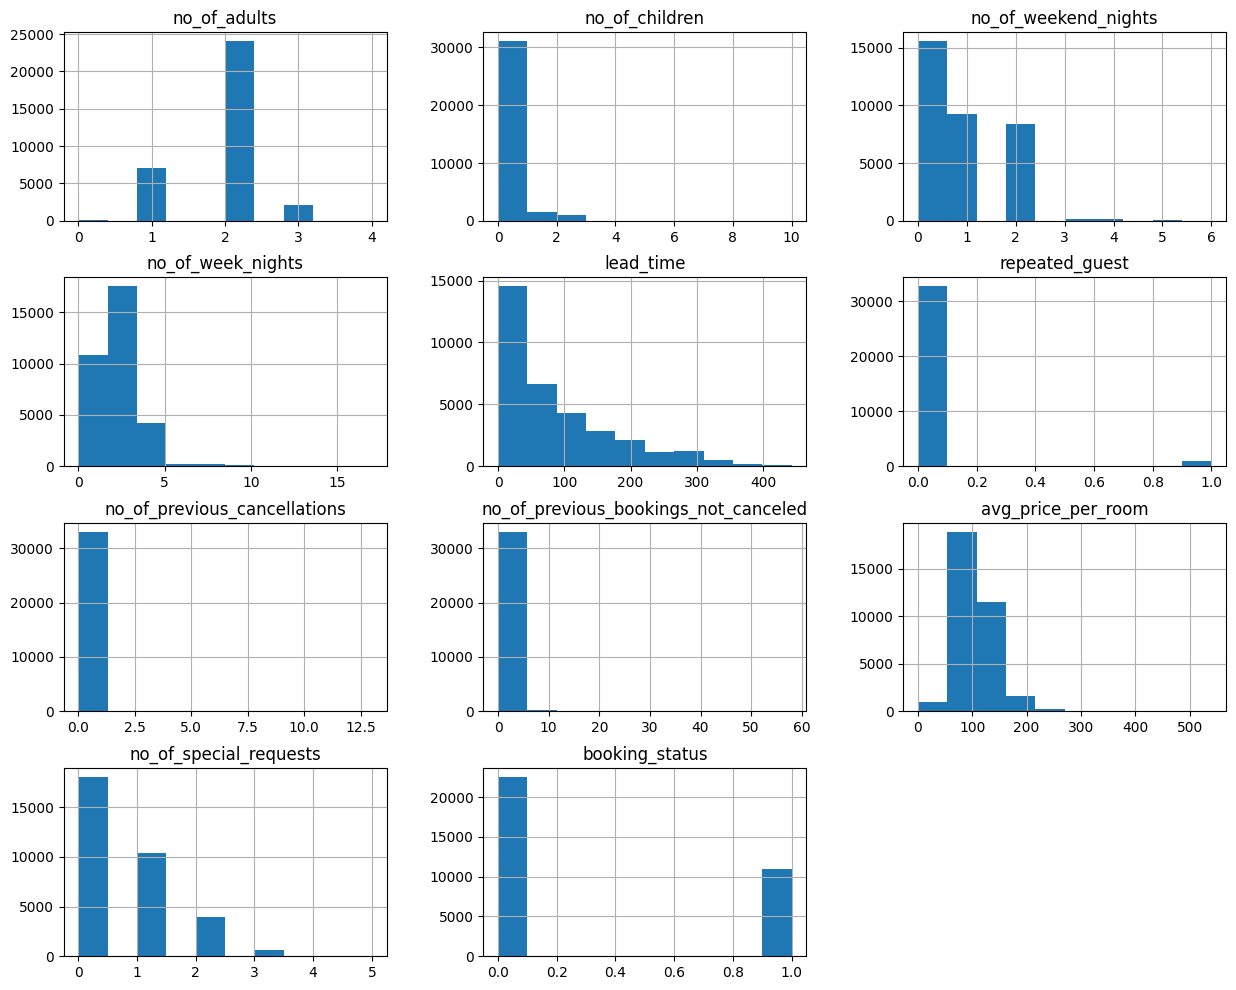

In [94]:
# visualize the distribution of the numerical variables in the dataframe
df.hist(figsize=(15,12))
plt.show()

In [95]:
df.no_of_adults.value_counts()

2.0    24028
1.0     7045
3.0     2148
0.0      126
4.0       13
Name: no_of_adults, dtype: int64

In [96]:
df=df[(df.no_of_adults==2.0) | (df.no_of_adults==1.0) | (df.no_of_adults==3.0)]
df.shape

(33221, 20)

In [97]:
df.no_of_children.value_counts()

0.0     30860
1.0      1488
2.0       856
3.0        14
9.0         2
10.0        1
Name: no_of_children, dtype: int64

In [98]:
df.no_of_children = np.where(df.no_of_children > 1, 2, df.no_of_children)

In [99]:
df.no_of_week_nights.value_counts()

2.0     10296
1.0      8578
3.0      7065
4.0      2669
0.0      2150
5.0      1477
6.0       172
7.0       105
8.0        57
10.0       52
9.0        30
11.0       15
15.0        9
12.0        9
14.0        7
13.0        5
17.0        2
16.0        2
Name: no_of_week_nights, dtype: int64

In [100]:
df.no_of_week_nights= np.where(df.no_of_week_nights> 5, 6, df.no_of_week_nights)
df.shape

(33221, 20)

In [101]:
df.no_of_weekend_nights.value_counts()

0.0    15399
1.0     9118
2.0     8285
3.0      140
4.0      120
5.0       31
6.0       20
Name: no_of_weekend_nights, dtype: int64

In [102]:
df.type_of_meal_plan.value_counts()

Meal Plan 1     25309
Not Selected     4688
Meal Plan 2      3004
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

****

In [103]:
# drop Meal Plan 3
df=df[df.type_of_meal_plan!="Meal Plan 3"]

In [104]:
df.no_of_week_nights.value_counts()

2.0    10295
1.0     8575
3.0     7064
4.0     2669
0.0     2150
5.0     1477
6.0      465
Name: no_of_week_nights, dtype: int64

In [105]:
df.room_type_reserved.value_counts()

Room_Type 1    25464
Room_Type 4     5471
Room_Type 6      880
Room_Type 2      508
Room_Type 5      237
Room_Type 7      130
Room_Type 3        5
Name: room_type_reserved, dtype: int64

In [106]:
df.required_car_parking_space.value_counts()

0.0    30554
nan     1681
1.0      981
Name: required_car_parking_space, dtype: int64

In [107]:
df.market_segment_type.value_counts()

Online           20913
Offline           9508
Corporate         1818
Complementary      345
Aviation           116
Name: market_segment_type, dtype: int64

In [108]:
df.repeated_guest.value_counts()

0.0    32368
1.0      848
Name: repeated_guest, dtype: int64

In [109]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,day,is_weekend
1,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018,11,6,Online,0.0,0.0,0.0,106.68,1.0,0,Tuesday,False
2,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018,2,28,Online,0.0,0.0,0.0,60.00,0.0,1,Wednesday,False
3,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018,5,20,Online,0.0,0.0,0.0,100.00,0.0,1,Sunday,True
4,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018,4,11,Online,0.0,0.0,0.0,94.50,0.0,1,Wednesday,False
5,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018,9,13,Online,0.0,0.0,0.0,115.00,1.0,1,Thursday,False


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33216 entries, 1 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          33216 non-null  float64
 1   no_of_children                        33216 non-null  float64
 2   no_of_weekend_nights                  33108 non-null  float64
 3   no_of_week_nights                     32695 non-null  float64
 4   type_of_meal_plan                     33001 non-null  object 
 5   required_car_parking_space            33216 non-null  object 
 6   room_type_reserved                    32695 non-null  object 
 7   lead_time                             33028 non-null  float64
 8   arrival_year                          33216 non-null  object 
 9   arrival_month                         33216 non-null  object 
 10  arrival_date                          33216 non-null  object 
 11  market_segment_

In [111]:
df.no_of_previous_bookings_not_canceled.value_counts()

0.0     32271
1.0       212
2.0        99
3.0        71
4.0        55
5.0        54
6.0        34
8.0        22
7.0        20
9.0        19
10.0       18
11.0       15
12.0       10
14.0        8
15.0        7
20.0        6
21.0        6
18.0        6
13.0        6
17.0        6
16.0        5
19.0        5
22.0        4
23.0        3
24.0        3
25.0        3
44.0        2
48.0        2
32.0        2
30.0        2
26.0        2
31.0        2
28.0        2
29.0        2
27.0        2
41.0        1
46.0        1
40.0        1
57.0        1
54.0        1
43.0        1
45.0        1
55.0        1
58.0        1
52.0        1
56.0        1
35.0        1
37.0        1
42.0        1
51.0        1
38.0        1
39.0        1
33.0        1
53.0        1
47.0        1
49.0        1
34.0        1
50.0        1
36.0        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [112]:
df.no_of_previous_cancellations.value_counts()

0.0     32540
1.0       181
3.0        39
2.0        39
11.0       22
5.0        11
4.0        10
13.0        4
6.0         1
Name: no_of_previous_cancellations, dtype: int64

In [113]:
df.no_of_previous_bookings_not_canceled=np.where(df.no_of_previous_bookings_not_canceled>0,1,0)
df.no_of_previous_cancellations=np.where(df.no_of_previous_cancellations>0,1,0)

# Visualisation

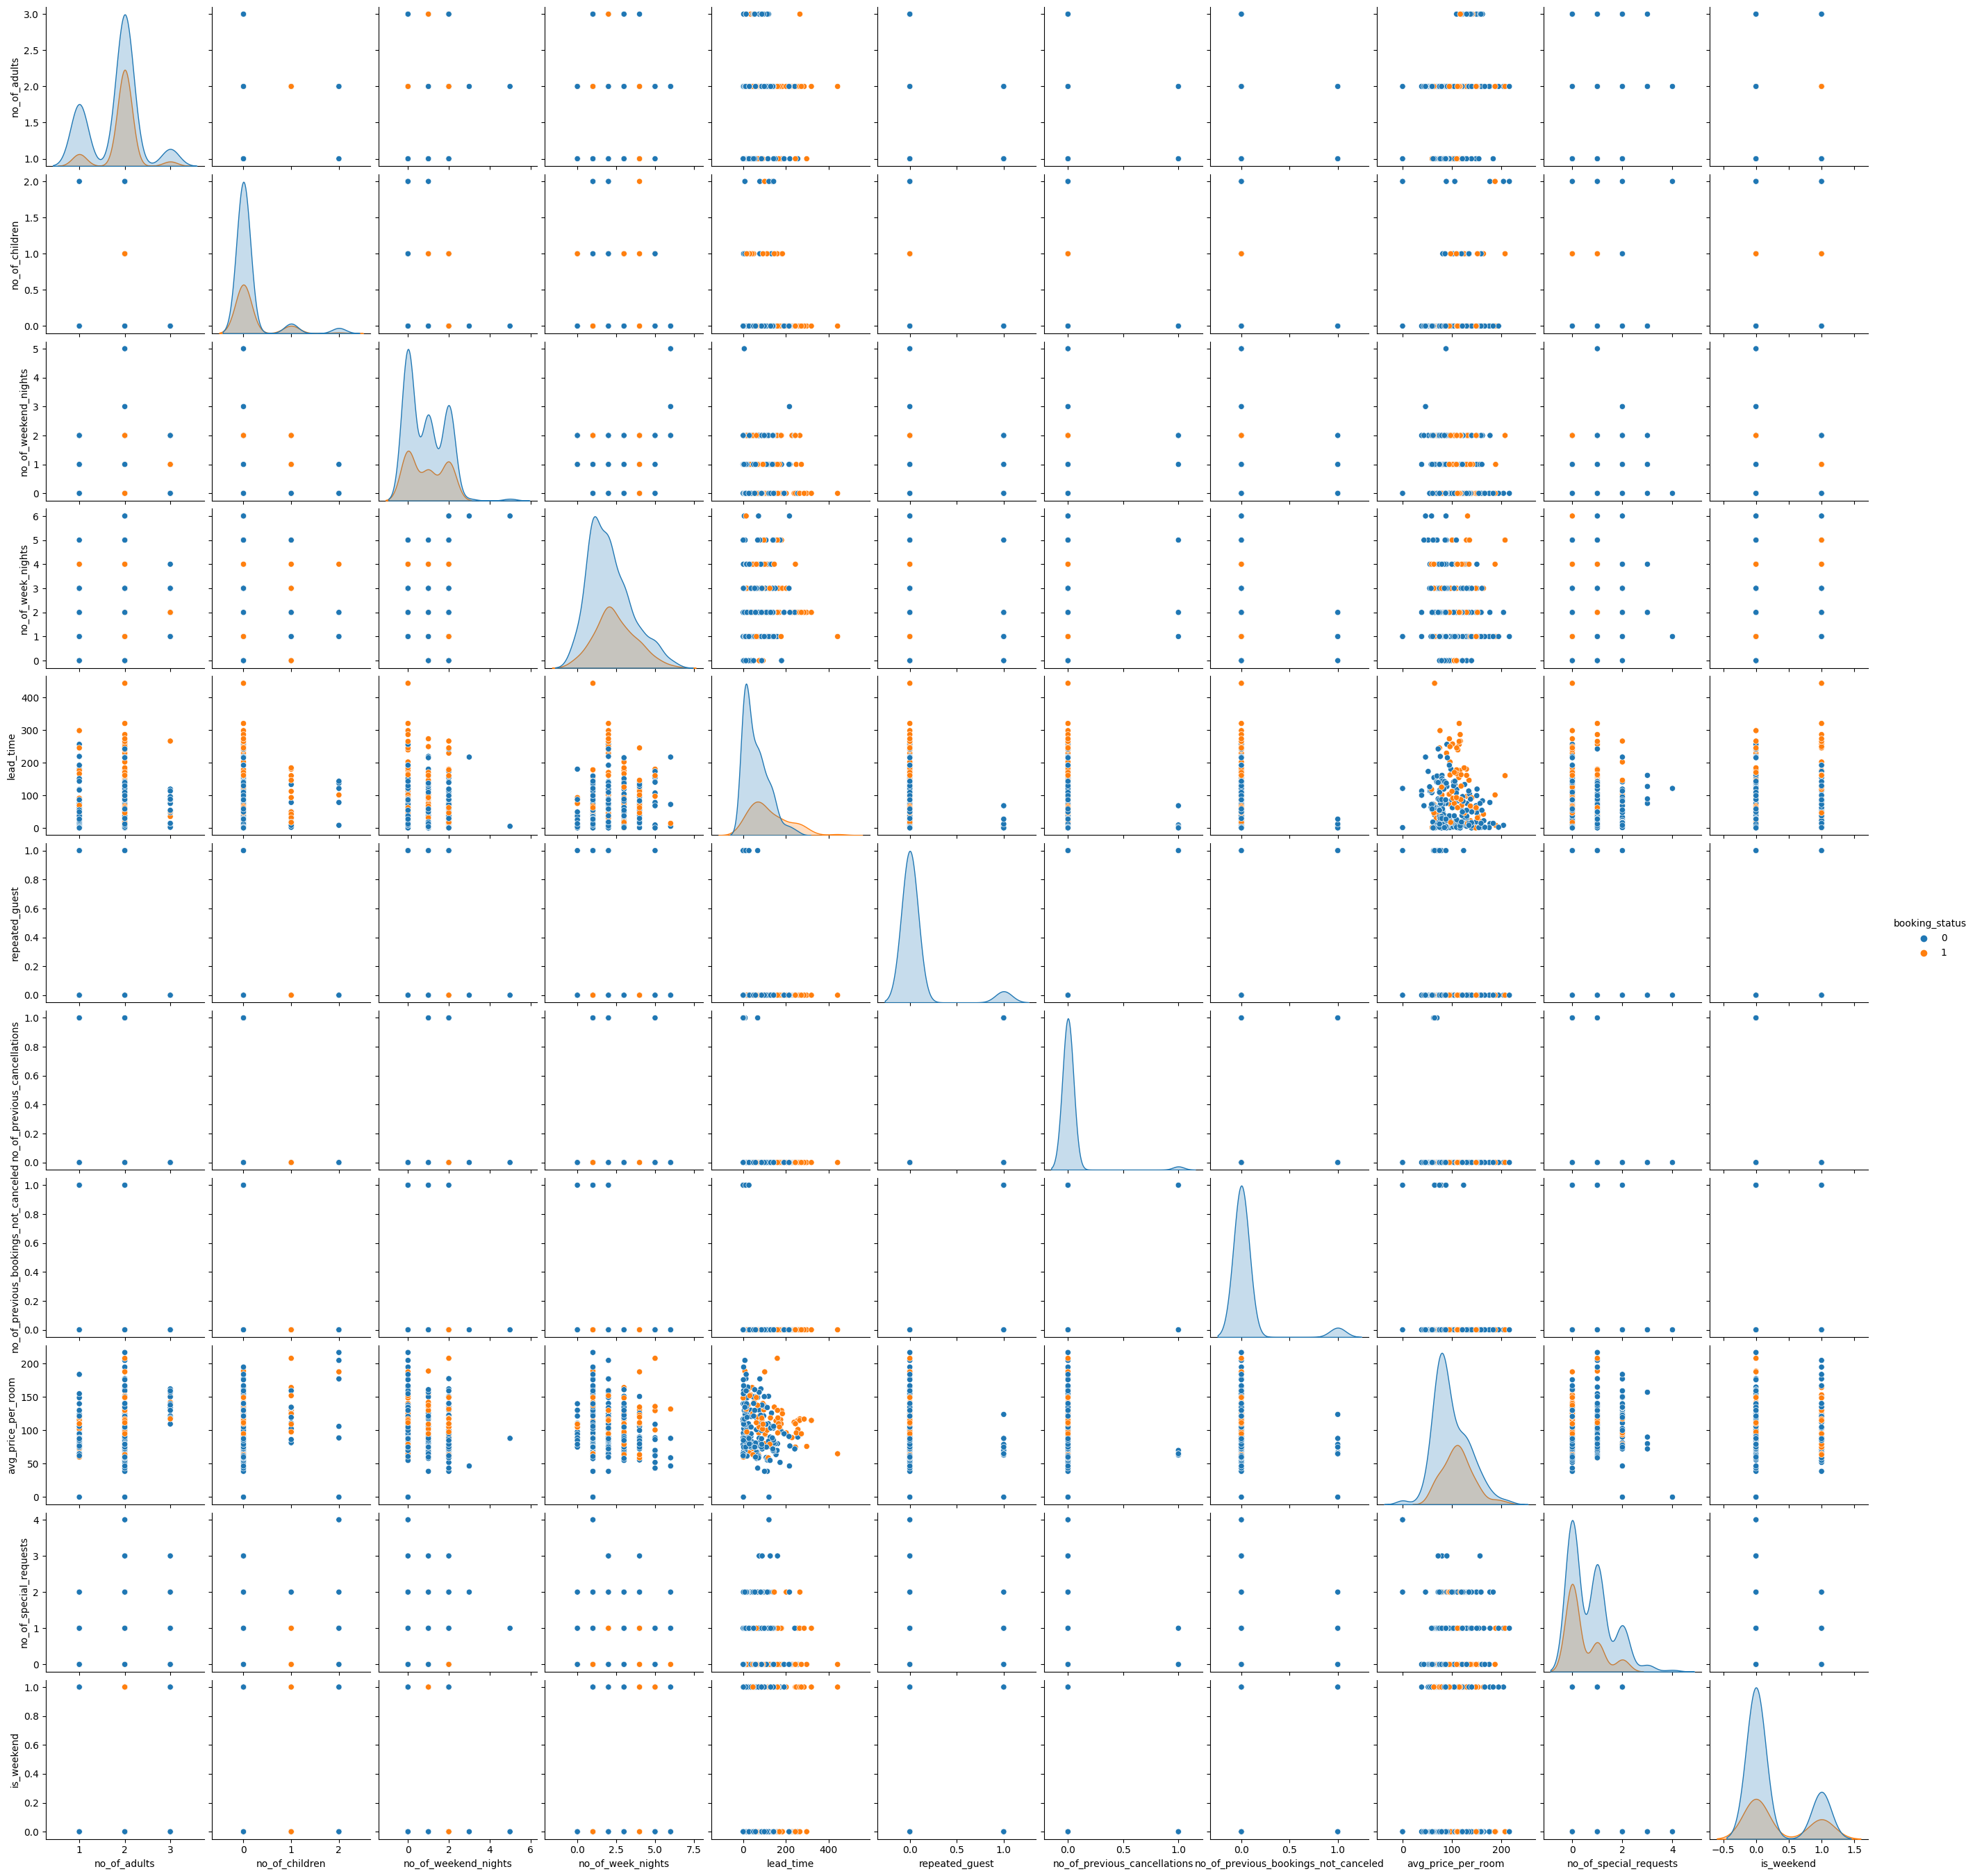

In [114]:
sns.pairplot(df.sample(frac=0.008),hue="booking_status");

In [115]:
df.groupby("booking_status").mean()["lead_time"]

booking_status
0     58.938369
1    139.082201
Name: lead_time, dtype: float64

1.     We can see that certain variables could be interesting in predicting booking cancellations.For example, The average lead time is higher for those who canceled their booking (139 days) compared to those who didn't (58 days).the average lead time for booking status 1 is much higher than for booking status 0, indicating that guests who cancel their bookings tend to book farther from the arrival date.
3.     We can also see that the average price per room is higher for booking status 1, indicating that guests who cancel their bookings tend to book more expensive rooms. Furthermore, we can observe that guests who canceled their bookings have a higher mean value of no_of_previous_cancellations (0.76) compared to those who didn't (0.33), suggesting that previous cancellations may be a significant factor in predicting cancellations.
4.     Finally, we can see that the variable no_of_special_requests has a higher mean value for guests who didn't cancel their bookings (0.76) compared to those who did (0.33), which may indicate that guests who request more special requests are less likely to cancel their bookings.

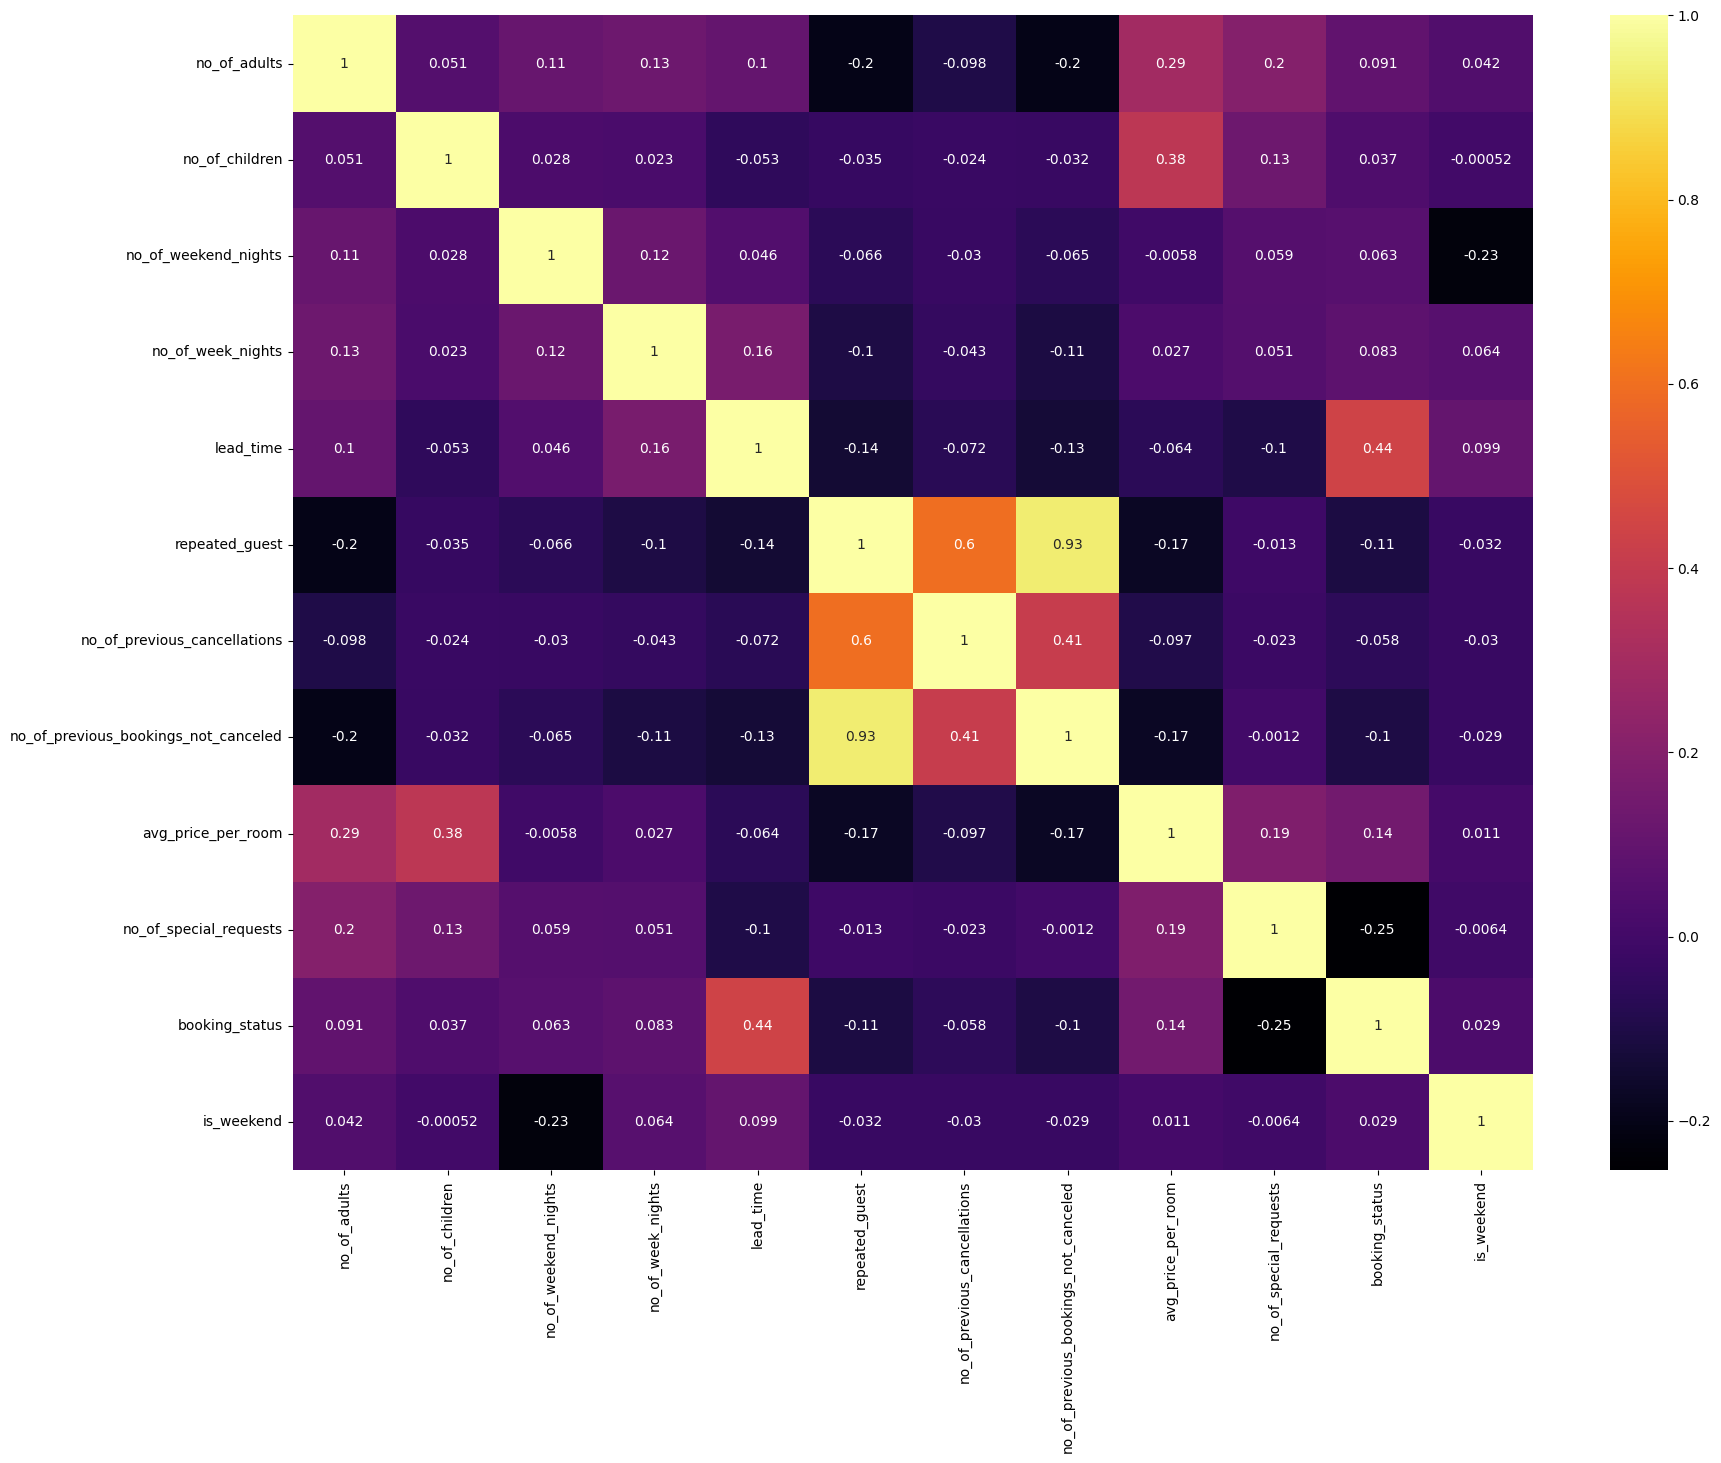

In [116]:
# This visualization is useful to identify the variables that have a strong correlation, either positively or negatively, and to spot potential multicollinearity issues in the dataset.
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),cmap='inferno',annot=True);

In [117]:
## drop higth correlated values
df.drop("no_of_previous_bookings_not_canceled",axis=1,inplace=True)

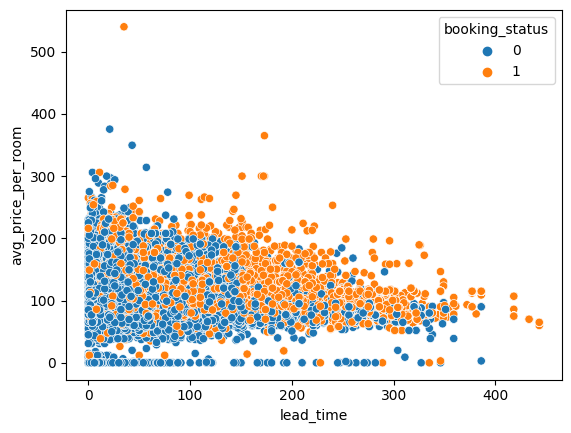

In [118]:
sns.scatterplot(df, x="lead_time", y="avg_price_per_room", hue="booking_status");

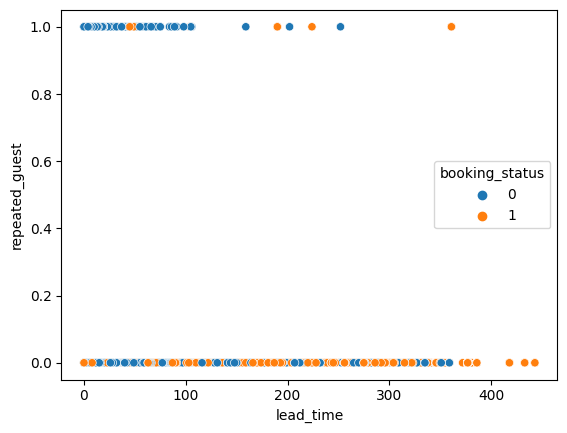

In [119]:
sns.scatterplot(df, x="lead_time", y="repeated_guest", hue="booking_status");

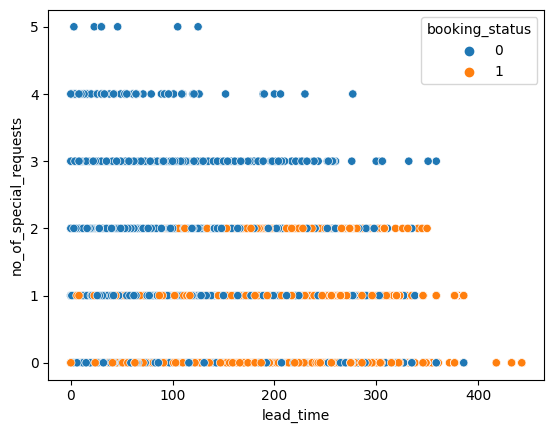

In [120]:
sns.scatterplot(df, x="lead_time", y="no_of_special_requests", hue="booking_status");

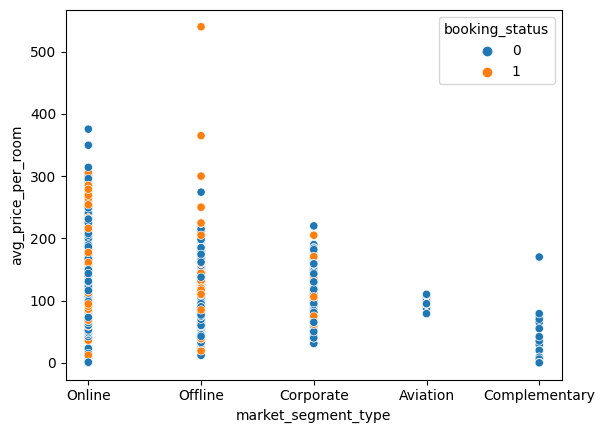

In [121]:
sns.scatterplot(df, x="market_segment_type", y="avg_price_per_room", hue="booking_status");

In [122]:
data=pd.get_dummies(df,drop_first=True)

In [123]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status,is_weekend,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,required_car_parking_space_1.0,required_car_parking_space_nan,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2018,arrival_month_10,arrival_month_11,arrival_month_12,arrival_month_2,arrival_month_3,arrival_month_4,arrival_month_5,arrival_month_6,arrival_month_7,arrival_month_8,arrival_month_9,arrival_date_10,arrival_date_11,arrival_date_12,arrival_date_13,arrival_date_14,arrival_date_15,arrival_date_16,arrival_date_17,arrival_date_18,arrival_date_19,arrival_date_2,arrival_date_20,arrival_date_21,arrival_date_22,arrival_date_23,arrival_date_24,arrival_date_25,arrival_date_26,arrival_date_27,arrival_date_28,arrival_date_29,arrival_date_3,arrival_date_30,arrival_date_31,arrival_date_4,arrival_date_5,arrival_date_6,arrival_date_7,arrival_date_8,arrival_date_9,arrival_date_nan,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
1,2.0,0.0,2.0,3.0,5.0,0.0,0,106.68,1.0,0,False,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1.0,0.0,2.0,1.0,1.0,0.0,0,60.00,0.0,1,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,2.0,0.0,0.0,2.0,211.0,0.0,0,100.00,0.0,1,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2.0,0.0,1.0,1.0,48.0,0.0,0,94.50,0.0,1,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5,2.0,0.0,0.0,2.0,346.0,0.0,0,115.00,1.0,1,False,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [124]:
import numpy as np
np.random.seed(42)
# Remplacement des valeurs manquantes avec des valeurs aléatoires basées sur la distribution des données existantes
for col in data.columns:
    if data[col].isna().sum() > 0:
        col_mean = data[col].mean()
        col_std = data[col].std()
        col_null_count = data[col].isna().sum()
        col_null_random_list = np.random.normal(col_mean, col_std, col_null_count)
        data[col][np.isnan(data[col])] = col_null_random_list

In [125]:
# check the distrubution again
data.booking_status.value_counts(normalize=True)

0    0.672236
1    0.327764
Name: booking_status, dtype: float64

In [126]:
data.isna().sum().sort_values(ascending=False)

no_of_adults         0
arrival_date_30      0
arrival_date_29      0
arrival_date_28      0
arrival_date_27      0
                    ..
arrival_month_12     0
arrival_month_11     0
arrival_month_10     0
arrival_year_2018    0
day_Wednesday        0
Length: 74, dtype: int64

In [127]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'repeated_guest',
       'no_of_previous_cancellations', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'is_weekend',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected',
       'required_car_parking_space_1.0', 'required_car_parking_space_nan',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'arrival_year_2018', 'arrival_month_10', 'arrival_month_11',
       'arrival_month_12', 'arrival_month_2', 'arrival_month_3',
       'arrival_month_4', 'arrival_month_5', 'arrival_month_6',
       'arrival_month_7', 'arrival_month_8', 'arrival_month_9',
       'arrival_date_10', 'arrival_date_11', 'arrival_date_12',
       'arrival_date_13', 'arrival_date_14', 'arriv

# Modelisation

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [129]:
X=data.drop("booking_status",axis=1)
y=data.booking_status
scacler=StandardScaler()

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [131]:
X_train,X_test=scacler.fit_transform(X_train),scacler.transform(X_test)

In [132]:
rf=RandomForestClassifier(random_state=42)

In [133]:
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

0.8967489464178205


In [134]:
scores = cross_val_score(rf, X_test, y_test, cv=5)

# On affiche les scores pour chaque fold
print(scores)

[0.88261851 0.87509406 0.86380737 0.86982694 0.87349398]


In [135]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4466
           1       0.88      0.80      0.84      2178

    accuracy                           0.90      6644
   macro avg       0.89      0.87      0.88      6644
weighted avg       0.90      0.90      0.90      6644



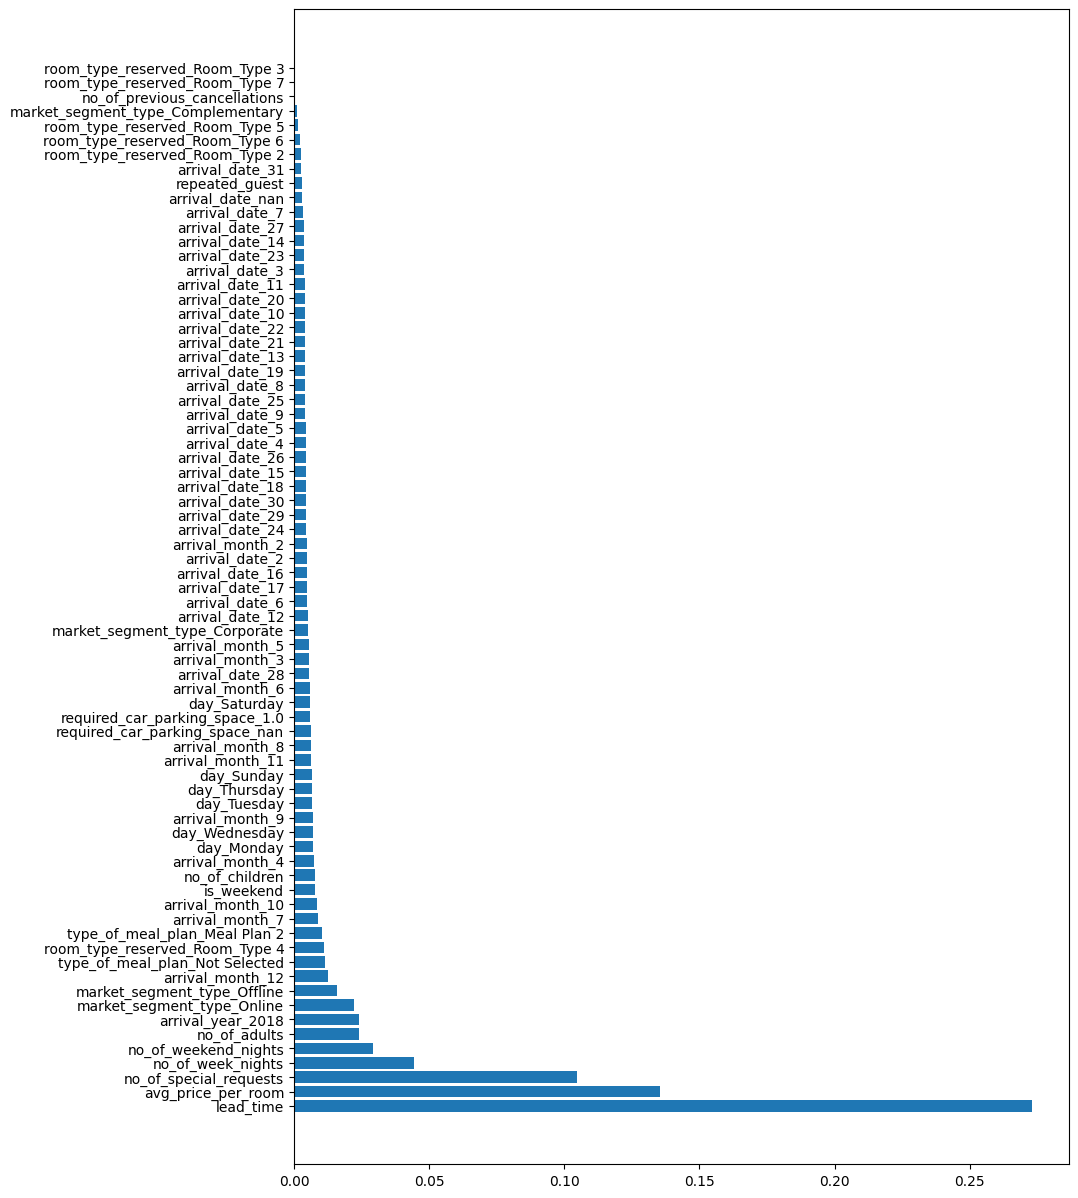

In [136]:
# rf is your random forest model
feat_importances = rf.feature_importances_
indices = np.argsort(feat_importances)[::-1]

# Sort feature names and importances in descending order
feat_names = X.columns[indices]
feat_importances = feat_importances[indices]
plt.subplots(figsize=(10,15))
# Plot feature importances in descending order

plt.barh(feat_names, feat_importances)
plt.show()

In [137]:
lasso_rf=LogisticRegressionCV(cv=5,random_state=42)

In [138]:
lasso_rf.fit(X_train,y_train)
print(lasso_rf.score(X_test,y_test))

0.8029801324503312


In [139]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

2023-05-07 02:06:15.135123: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-07 02:06:15.135147: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [140]:
tf.random.set_seed(42)
model=Sequential()

model.add(tf.keras.layers.Input(shape=X_train.shape[1]))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(114,activation='relu'))
model.add(tf.keras.layers.Dense(18,activation='sigmoid'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Reshape(target_shape=(-1,1)))

model.add(tf.keras.layers.Conv1D(32,1,activation='sigmoid'))
model.add(tf.keras.layers.GlobalAveragePooling1D())

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9472      
                                                                 
 dense_1 (Dense)             (None, 114)               14706     
                                                                 
 dense_2 (Dense)             (None, 18)                2070      
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 reshape (Reshape)           (None, 18, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 18, 32)            64        
                                                                 
 global_average_pooling1d (G  (None, 32)               0

2023-05-07 02:06:16.944869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-07 02:06:16.944893: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-07 02:06:16.944911: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (eb58289f-3abf-4bd6-9dd1-adc4984a5192): /proc/driver/nvidia/version does not exist
2023-05-07 02:06:16.945108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [141]:
history_tf=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=14)

Epoch 1/14
831/831 [==============================] - 2s 2ms/step - loss: 0.5656 - accuracy: 0.6783 - val_loss: 0.4825 - val_accuracy: 0.8043
Epoch 2/14
831/831 [==============================] - 1s 2ms/step - loss: 0.4569 - accuracy: 0.8168 - val_loss: 0.4178 - val_accuracy: 0.8204
Epoch 3/14
831/831 [==============================] - 1s 2ms/step - loss: 0.4190 - accuracy: 0.8297 - val_loss: 0.4070 - val_accuracy: 0.8213
Epoch 4/14
831/831 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8370 - val_loss: 0.3963 - val_accuracy: 0.8362
Epoch 5/14
831/831 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8442 - val_loss: 0.3885 - val_accuracy: 0.8349
Epoch 6/14
831/831 [==============================] - 1s 2ms/step - loss: 0.3721 - accuracy: 0.8498 - val_loss: 0.3838 - val_accuracy: 0.8442
Epoch 7/14
831/831 [==============================] - 2s 2ms/step - loss: 0.3621 - accuracy: 0.8554 - val_loss: 0.3754 - val_accuracy: 0.8450
Epoch 

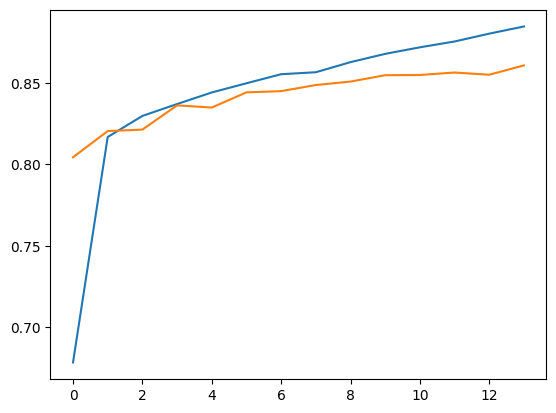

In [142]:
plt.plot(history_tf.history["accuracy"])
plt.plot(history_tf.history["val_accuracy"]);

In [143]:
print(classification_report(y_test,model.predict(X_test)>0.5))

208/208 [==============================] - 0s 722us/step
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4466
           1       0.81      0.75      0.78      2178

    accuracy                           0.86      6644
   macro avg       0.85      0.83      0.84      6644
weighted avg       0.86      0.86      0.86      6644



In [ ]:
con